Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Downloading Skin Cancer Data

In [ ]:
#downloading the data in local

In [10]:
# import gdown

# url = 'https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'
# output = 'data.tgz'

# gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: C:\Users\hp\Downloads\upgrad\GitHub\Melanoma_Detection_Assignment\data.tgz
100%|███████████████████████████████████████████████████████████████████████████████| 824M/824M [02:39<00:00, 5.16MB/s]


'data.tgz'

In [ ]:
#Unzip manually and give the correct path below to read the data

### Importing all the important libraries

In [55]:
#import the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import BatchNormalization
import seaborn
from glob import glob

### Read Data

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("data/Train/")
data_dir_test = pathlib.Path('data/Test/')

In [3]:
# Count the total number of image in Train and Test directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load Data

### Load using keras.preprocessing

- Let's load these images off disk using the helpful image_dataset_from_directory utility.
#### While loading as per the requirnment we -
- Created train & validation dataset from the train directory with a batch size of 32 .
- Resized images to 180*180.(10%)

Use 80% of the images for training, and 20% for validation.

In [4]:
#visualize one instance of all the nine classes present in the dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    validation_split=0.2,subset="training",
                                                               label_mode='categorical',seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    validation_split=0.2,subset="validation",
                                                               label_mode='categorical',seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [6]:
#all the class_names
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [7]:
print(str(data_dir_train))

data\Train


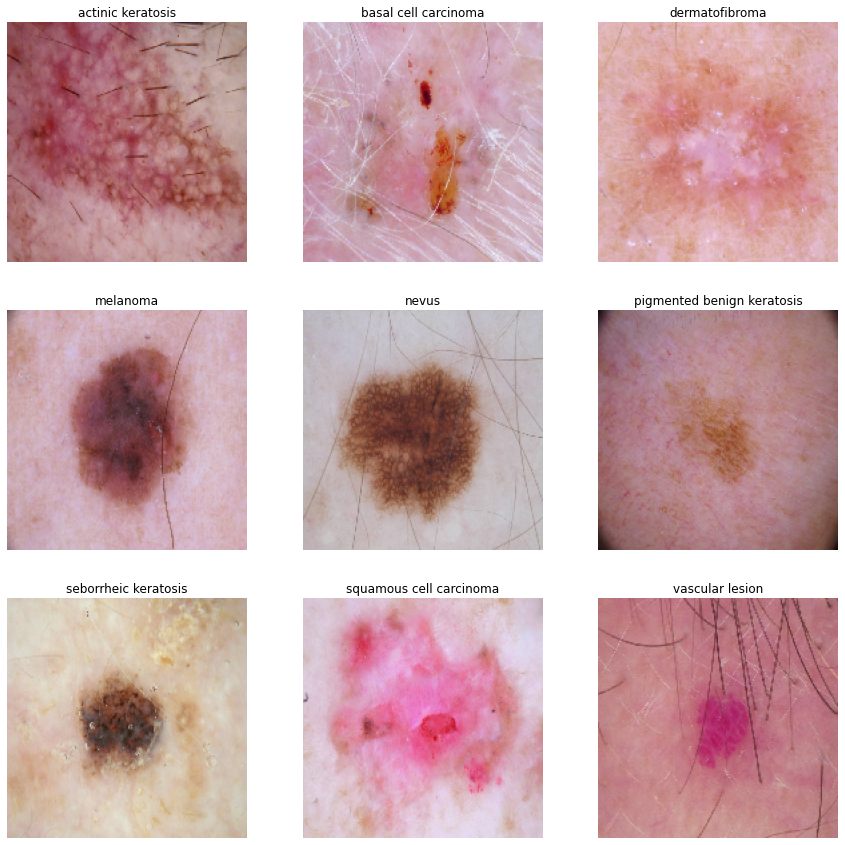

In [8]:
### Visualize one instance of all the class present in the train dataset
files_paths= {}

for i in class_names:
    files_paths[i] = list(map(lambda x:str(data_dir_train)+'/'+i+'/'+x,os.listdir(str(data_dir_train)+'/'+i)))

#Visualize 1st image 
plt.figure(figsize=(15,15))
index = 0
for i in class_names:
    path_list = files_paths[i][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(i)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
#Model building belwo
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
#Compile the Model

#using Adam optimization & categorical_crossentropy
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 139s 2s/step - loss: 1.9585 - accuracy: 0.2573 - val_loss: 1.7684 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 121s 2s/step - loss: 1.7474 - accuracy: 0.3650 - val_loss: 1.5254 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 109s 2s/step - loss: 1.4410 - accuracy: 0.4855 - val_loss: 1.4166 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 88s 2s/step - loss: 1.3427 - accuracy: 0.5234 - val_loss: 1.3976 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 1.2723 - accuracy: 0.5491 - val_loss: 1.3858 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 91s 2s/step - loss: 1.2050 - accuracy: 0.5681 - val_loss: 1.3919 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.1037 - accuracy: 0.6016 - val_loss: 1.4712 - val_accuracy: 0.5190
Epoch 8/20
56/56 

### Visualizing training results

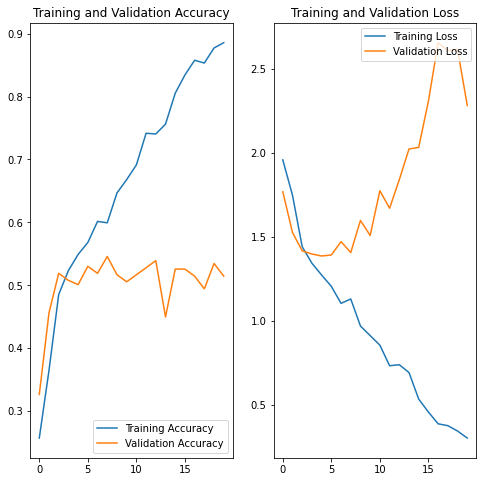

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- After visualize the plot between tarining and validation we can cleary see that model is overfitting in both the plots.
- As epochs increases train data overfits while validation remains same.

#### To fix this overfitting 
- we can add dropout/normalization parameters and early stopping.
###### lets rebuild the model again after making these changes

### Todo:
### Create the model, compile and train the model


In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
### Your code goes here
#Model building belwo
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Dropout layer with 40% Fraction of the input units to drop.
model.add(layers.Dropout(0.4))
#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))
#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Dense Layer with softmax activation function.
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compiling the model

In [27]:
## Your code goes here
#Compile the Model

#using Adam optimization & categorical_crossentropy
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

# #using ModelCheckpoint callback so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

# #Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 43, 43, 64)       

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 83s 1s/step - loss: 2.2948 - accuracy: 0.1998 - val_loss: 2.1305 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 82s 1s/step - loss: 1.9316 - accuracy: 0.2868 - val_loss: 1.9581 - val_accuracy: 0.2886
Epoch 3/20
56/56 [==============================] - 82s 1s/step - loss: 1.7895 - accuracy: 0.3410 - val_loss: 1.7395 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 82s 1s/step - loss: 1.6902 - accuracy: 0.3694 - val_loss: 1.6348 - val_accuracy: 0.3982
Epoch 5/20
56/56 [==============================] - 82s 1s/step - loss: 1.6314 - accuracy: 0.4107 - val_loss: 1.5764 - val_accuracy: 0.4452
Epoch 6/20
56/56 [==============================] - 82s 1s/step - loss: 1.5184 - accuracy: 0.4559 - val_loss: 1.4973 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.4693 - accuracy: 0.4849 - val_loss: 1.4668 - val_accuracy: 0.5190
Epoch 8/20
56/56 [==

### Visualizing the results

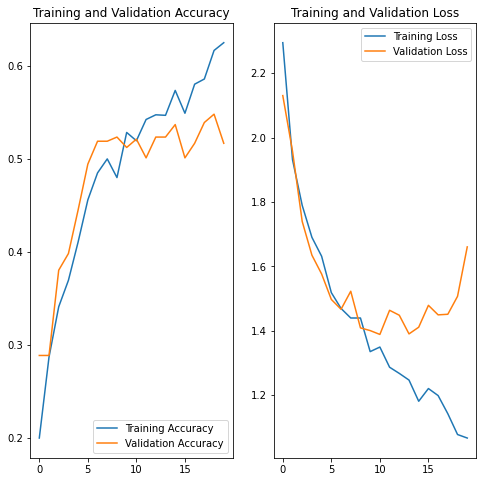

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- there's definitely some improvement in terms of overfitting the model.
- We can see training and validation accuracy and losses are almost similar.
- now the problem reamins with the model overall performance. Lets look into the no. of samples per class and try to do oversampling if there is class  imbalancing

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [31]:
## Your code goes here.
#lets count number of image in each classes
count= []
for path in pathlib.Path(data_dir_train).iterdir():
    if path.is_dir():
        count.append(len([name for name in os.listdir(path)
                           if os.path.isfile(os.path.join(path, name))]))

sub_directory = [name for name in os.listdir(data_dir_train)
                if os.path.isdir(os.path.join(data_dir_train, name))]

df=pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Count'])
#below resutls have total of train+val data
print(df)

                        Class  Count
0           actinic keratosis    114
1        basal cell carcinoma    376
2              dermatofibroma     95
3                    melanoma    438
4                       nevus    357
5  pigmented benign keratosis    462
6        seborrheic keratosis     77
7     squamous cell carcinoma    181
8             vascular lesion    139


<AxesSubplot:xlabel='Count', ylabel='Class'>

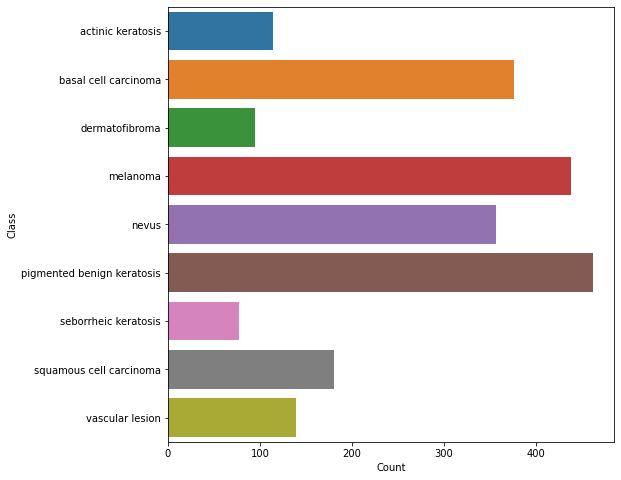

In [32]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.barplot(x="Count", y="Class", data=df,
            label="Class")

#### **Todo:** Write your findings here: 
- From above plot we can say the following
#### - Which class has the least number of samples?  -> seborrheic keratosis 
#### - Which classes dominate the data in terms proportionate number of samples? -> pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [33]:
!pip install Augmentor

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=10a419d7f8d3814d8148beee11ad23e5d9f9979642769f73c8c039ebc6d864e5
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [34]:
path_to_training_dataset="data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19956D21188>: 100%|█| 500/500 [00:08<00:00, 57.06 Samples/


Initialised with 376 image(s) found.
Output directory set to data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19914E59908>: 100%|█| 500/500 [00:10<00:00, 45.63 Samples/


Initialised with 95 image(s) found.
Output directory set to data/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x199093751C8>: 100%|█| 500/500 [00:08<00:00, 57.94 Samples/


Initialised with 438 image(s) found.
Output directory set to data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1995C208B48>: 100%|█| 500/500 [00:49<00:00, 10.13 Samples/


Initialised with 357 image(s) found.
Output directory set to data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x19956CCD248>: 100%|█| 500/500 [00:48<00:00, 10.32 Samples


Initialised with 462 image(s) found.
Output directory set to data/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19956B12908>: 100%|█| 500/500 [00:09<00:00, 53.51 Samples/


Initialised with 77 image(s) found.
Output directory set to data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x199060DDA48>: 100%|█| 500/500 [00:20<00:00, 24.83 Samples


Initialised with 181 image(s) found.
Output directory set to data/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19914E61908>: 100%|█| 500/500 [00:08<00:00, 56.36 Samples/


Initialised with 139 image(s) found.
Output directory set to data/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19914DCC408>: 100%|█| 500/500 [00:12<00:00, 41.14 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [48]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df.append(df2)

In [49]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [77]:
data_dir_train="data/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model

In [79]:
### Your code goes here
#Model building belwo
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
#adding normalization as requested
model.add(BatchNormalization()) 
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
#adding normalization as requested
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Dropout layer with 40% Fraction of the input units to drop.
model.add(layers.Dropout(0.4))
#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))
#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.2))

#Dense Layer with softmax activation function.
model.add(layers.Dense(len(class_names),activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [80]:
## Your code goes here
#Compile the Model

#using Adam optimization & categorical_crossentropy
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

# #using ModelCheckpoint callback so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

# #Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 87, 87, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 43, 43, 64)     

#### **Todo:**  Train your model

In [82]:
#Changed to epochs to 50 as mentioned below
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 317s 2s/step - loss: 3.7328 - accuracy: 0.1945 - val_loss: 14.5611 - val_accuracy: 0.1188
Epoch 2/50
169/169 [==============================] - 315s 2s/step - loss: 2.0454 - accuracy: 0.2287 - val_loss: 10.7593 - val_accuracy: 0.2049
Epoch 3/50
169/169 [==============================] - 314s 2s/step - loss: 1.9837 - accuracy: 0.2535 - val_loss: 3.0254 - val_accuracy: 0.1886
Epoch 4/50
169/169 [==============================] - 315s 2s/step - loss: 1.9154 - accuracy: 0.2687 - val_loss: 9.1232 - val_accuracy: 0.2138
Epoch 5/50
169/169 [==============================] - 315s 2s/step - loss: 1.8655 - accuracy: 0.2904 - val_loss: 2.0264 - val_accuracy: 0.2376
Epoch 6/50
169/169 [==============================] - 315s 2s/step - loss: 1.8190 - accuracy: 0.2908 - val_loss: 2.7808 - val_accuracy: 0.2272
Epoch 7/50
169/169 [==============================] - 318s 2s/step - loss: 1.7971 - accuracy: 0.3053 - val_loss: 1.8087 - val_accuracy: 0.30

#### **Todo:**  Visualize the model results

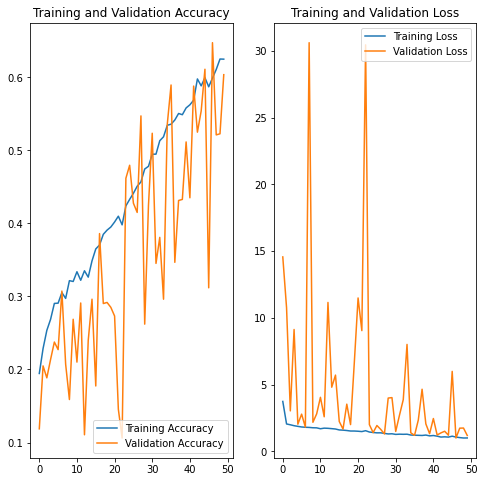

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Initial model didnt perform well because it suffers from overfitting.
- To reduce overfititng we added dropout layers and earlystopping , which helped fix overfitting but it reduced the overall performance of the model.
- We tried Batch Normalization and Augumentation which helped in fixing class imbalancing problem but val score seems to be unstable.